In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("sales_data.csv", low_memory=False)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017081 entries, 0 to 1017080
Data columns (total 22 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Order_ID        1017081 non-null  int64  
 1   Branch          1017081 non-null  object 
 2   Order_Date      1017081 non-null  object 
 3   Order_Priority  1017081 non-null  object 
 4   Manufacturer    1017081 non-null  object 
 5   Model_Name      1017081 non-null  object 
 6   Category        1017081 non-null  object 
 7   Screen_Size     1017081 non-null  object 
 8   Screen          1017081 non-null  object 
 9   CPU             1017081 non-null  object 
 10  RAM             1017081 non-null  object 
 11  Storage         1017081 non-null  object 
 12  GPU             1017081 non-null  object 
 13  OS              1017081 non-null  object 
 14  OS_Version      908989 non-null   object 
 15  Weight          1017081 non-null  object 
 16  Price           1017081 non-null  in

In [3]:
df = dataset[['Manufacturer', 'Model_Name', 'Category', 'Screen_Size', 'Screen', 'CPU', 'RAM', 'GPU', 'OS', 'OS_Version', 'Weight', 'Price', 'Quantity', 'Discount', 'Order_ID']]
def rmkg(char = str):
    char = float(char.replace('k', '').replace('g', '').replace('s', ''))
    return char
df['Weight'] = df['Weight'].apply(rmkg)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_14740\2869100610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].apply(rmkg)


In [ ]:
dataframe = pd.read_csv("sales_data.csv")
dataframe1 = dataframe.drop(["Order_ID", "Branch", "Order_Date", "Order_Priority", "Model_Name", "Screen", "OS", "OS_Version", "Quantity", "Discount", "Profit", "Ship_Duration" ,"Total_Price" ], axis=1)
dataframe1['Screen_Size'] = dataframe1['Screen_Size'].str[:-1].astype(float)
dataframe1['Screen_Size_cm'] = dataframe1['Screen_Size'] * 2.54
dataframe1["RAM"] = dataframe1['RAM'].str[:-2].astype(float)
dataframe1["RAM_meg"] = dataframe1['RAM']*1024
dataframe1["Weight_kg"] = dataframe1["Weight"].str[:-1]
dataframe1["Weight_kg"] = dataframe1["Weight_kg"].str[:-1]

dataframe1["Weight_kg"] = pd.to_numeric(dataframe1["Weight_kg"], errors="coerce")
dataframe1["Weight_kg"] = dataframe1["Weight_kg"]* 1000
dataframe1["Storage_meg"] = dataframe1["Storage"]

In [4]:
df.drop_duplicates(inplace=True)
df1 = df.groupby(by=['Manufacturer', 'Category', 'Screen_Size', 'Screen', 'CPU', 'RAM', 'GPU', 'OS'], group_keys=False)['Order_ID'].count()
df1 = pd.DataFrame(df1.sort_values().reset_index())

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_14740\2987488675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_14740\904085251.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.loc[:, df1.columns != 'Order_ID'] = df1.loc[:, df1.columns != 'Order_ID'].apply(le.fit_transform)


<Axes: >

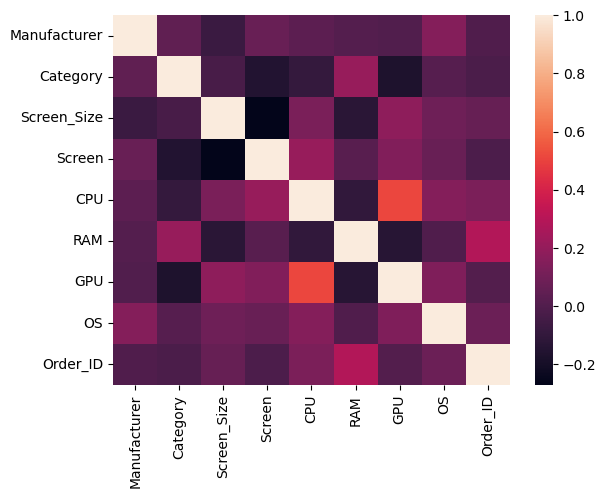

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.loc[:, df1.columns != 'Order_ID'] = df1.loc[:, df1.columns != 'Order_ID'].apply(le.fit_transform)
sns.heatmap(df1.corr())

In [7]:
corr_frame = df1.corr()
corr_frame.rename({'Order_ID': 'CountOrders'}, axis=1, inplace=True)
corr_frame.to_csv('corrf.csv')

In [20]:
df3 = df.groupby(by=['CPU', 'Category', 'Manufacturer', 'Screen_Size', 'Screen', 'RAM', 'GPU', 'OS'])['Order_ID'].count()
pd.DataFrame(df3.sort_values().reset_index())

,CPU,Category,Manufacturer,Screen_Size,Screen,RAM,GPU,OS,Order_ID
0,Intel Core i7 6920HQ 2.9GHz,Gaming,MSI,"18.4""",Full HD 1920x1080,32GB,Nvidia GTX 980 SLI,Windows,76
1,Intel Core i7 7700HQ 2.8GHz,Workstation,Dell,"15.6""",Full HD 1920x1080,8GB,Nvidia Quadro M1200,Windows,80
2,Intel Core i7 7700HQ 2.8GHz,Notebook,Dell,"15.6""",4K Ultra HD / Touchscreen 3840x2160,32GB,Nvidia GeForce GTX 1050,Windows,81
3,Intel Core i7 7820HK 2.9GHz,Gaming,MSI,"17.3""",Full HD 1920x1080,16GB,Nvidia GeForce GTX 1070,Windows,82
4,Intel Core i7 7820HQ 2.9GHz,Workstation,Dell,"17.3""",Full HD 1920x1080,16GB,Nvidia Quadro M1200,Windows,82
...,...,...,...,...,...,...,...,...,...
1007,Intel Core i5 8250U 1.6GHz,Notebook,Dell,"15.6""",Full HD 1920x1080,8GB,AMD Radeon 530,Windows,6450
1008,Intel Core i5 7300HQ 2.5GHz,Gaming,MSI,"15.6""",Full HD 1920x1080,8GB,Nvidia GeForce GTX 1050,Windows,7369
1009,Intel Core i5 7300HQ 2.5GHz,Gaming,Dell,"15.6""",Full HD 1920x1080,8GB,Nvidia GeForce GTX 1050,Windows,7741
1010,Intel Core i5 7200U 2.5GHz,Notebook,Dell,"15.6""",Full HD 1920x1080,8GB,Intel HD Graphics 620,Windows,8196


<Axes: >

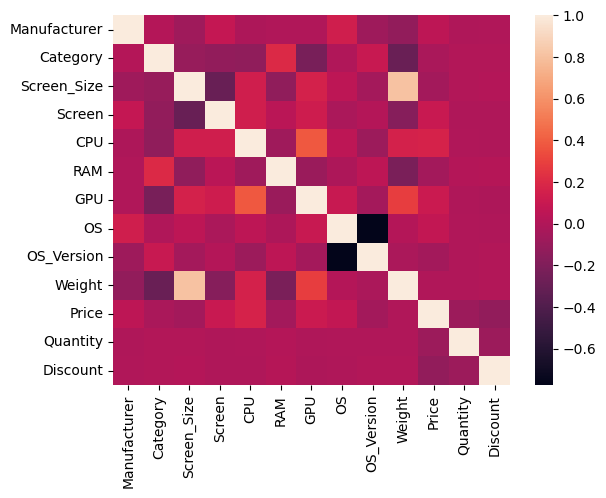

In [12]:
# df.drop('Model_Name', axis=1, inplace=True)
sns.heatmap(df.corr())